<a href="https://colab.research.google.com/github/Abhiss123/AlmaBetter-Projects/blob/main/Naive_BayesInsight_Website_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name :- Naive BayesInsight: Website Sentiment Classification

**Purpose of the Project:**
*  The purpose of this project is to develop and implement a **Naive Bayes-based sentiment analysis tool** that can efficiently **classify** **text data, such as customer reviews, social media comments, or website content, into categories like positive, negative, or neutral sentiments.** The project aims to leverage the Naive Bayes classifier's simplicity and effectiveness in handling large volumes of textual data to provide actionable insights for website owners, businesses, and organizations.

* This tool will help in **automating the process of sentiment detection and content categorization, allowing stakeholders to quickly assess the overall sentiment of their audience, identify trends, and make informed decisions to improve their services, products, or content strategy.** By classifying feedback and content accurately, the project seeks to enhance customer engagement, optimize content management, and improve the overall user experience on websites or digital platforms.

*  The project also explores the versatility of the Naive Bayes classifier across different domains, demonstrating its applicability not just in traditional text classification tasks, but also in specialized areas such as SEO, AI-based services, and digital marketing. The ultimate goal is to create a robust, user-friendly tool that can be easily adapted to various use cases, helping businesses and individuals alike to better understand and respond to their audience's needs.





# What is Naive Bayes?

**Naive Bayes is a family of probabilistic classifiers based on Bayes' Theorem**, which provides a way to calculate the probability of a class (such as spam or not spam) given some input features (such as words in an email). The term "naive" comes from the assumption that all features are independent of each other, which is rarely true in real-world scenarios. Despite this simplification, Naive Bayes classifiers perform remarkably well in many practical applications, particularly in text classification tasks.

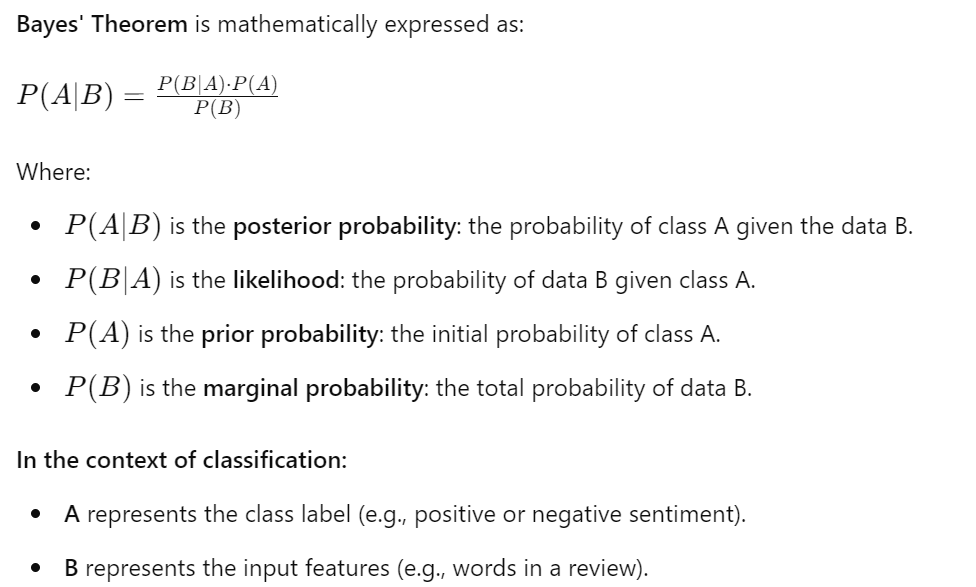

# Key Steps in Naive Bayes Classification:

**1. Training Phase:**

* Calculate the prior probability for each class based on the training data.
* Calculate the likelihood of each feature given each class.

**2. Prediction Phase:**

* For a new input, calculate the posterior probability for each class using Bayes' Theorem.
* Assign the input to the class with the highest posterior probability.

**Types of Naive Bayes Classifiers:**

* **Gaussian Naive Bayes:** Assumes that the continuous features follow a Gaussian (normal) distribution. Suitable for data with continuous variables.
* **Multinomial Naive Bayes:** Typically used for discrete data, such as word counts in text classification.

* **Bernoulli Naive Bayes:** Suitable for binary/boolean features, indicating the presence or absence of a feature.



# Use Cases Of Naive Bayes :

Naive Bayes classifiers are versatile and can be applied across various domains. Here are some common use cases:

**1. Text Classification:**

* **Spam Detection:** Classifying emails as spam or not spam.

* **Document Categorization:** Assigning documents to predefined categories (e.g., news articles to topics like sports, politics, technology).

**Example :**

* **Spam Filtering:** Email providers like Gmail and Outlook use Naive Bayes classifiers to filter out spam emails by analyzing the content and identifying spammy patterns.

**2. Sentiment Analysis:**

* **Opinion Mining:** Determining the sentiment expressed in user reviews, social media posts, or customer feedback (e.g., positive, negative, neutral).

**Example:**

 * **Sentiment Analysis on Social Media Platforms:** Companies like Twitter and Facebook analyze user posts and comments to gauge public sentiment about brands, products, or events.


**3. Recommendation Systems:**

* **Predicting User Preferences:** Suggesting products, movies, or content based on user behavior and preferences.

**Example :**

* **Product Recommendation on E-commerce Websites:** Online retailers like Amazon use Naive Bayes to recommend products based on user behavior and purchase history.

**4. Medical Diagnosis:**

* **Predicting Diseases:** Classifying patients based on symptoms to predict the likelihood of certain diseases.

**Example :**

*  **Disease Prediction in Healthcare:** Hospitals and clinics use Naive Bayes to predict diseases based on patient symptoms and medical history, aiding in early diagnosis and treatment.


**5. Fraud Detection:**

* **Identifying Fraudulent Transactions:** Detecting unusual patterns in financial transactions that may indicate fraud.

**Example :**

*  **Credit Scoring in Financial Services:** Banks use Naive Bayes classifiers to assess the creditworthiness of loan applicants by analyzing financial histories and other relevant data.

**6. Language Detection:**

* **Automatic Language Identification:** Determining the language of a given text.

**7. Customer Support:**

* **Categorizing Support Tickets:** Assigning support requests to appropriate departments based on the content.

**Example :**

* **Ticket Routing in Customer Support Systems:** Support platforms like Zendesk use Naive Bayes to automatically categorize and route support tickets to the appropriate teams.


# How Does It Help a Website Owner

Naive Bayes in Sentiment Analysis can be particularly beneficial for website owners and various other segments by providing insights into customer opinions and behaviors. Here's how it can help:

***For Website Owners:***

**1. Understanding Customer Feedback:**

*  **Analyzing Reviews:** Automatically categorize customer reviews as positive, negative, or neutral to understand overall customer satisfaction.

*  **Improving Products/Services:** Identify common issues or praised features to make informed improvements.

**2. Enhancing User Experience:**

* **Personalized Content:** Tailor website content based on the sentiment analysis of user interactions and feedback.
* **Targeted Marketing:** Create marketing campaigns that resonate with the sentiments of your audience, increasing engagement and conversion rates.

**3. Reputation Management:**

* **Monitoring Brand Sentiment:** Continuously track how your brand is perceived online, allowing you to address negative sentiments promptly.
*  **Crisis Management:** Detect early signs of negative sentiment that could escalate into a PR crisis and take corrective actions swiftly.

**4. Optimizing Customer Support:**

*  **Prioritizing Support Tickets:** Automatically classify support tickets based on sentiment to prioritize urgent or negative cases.
*  **Improving Response Strategies:** Understand common pain points to develop better support responses and strategies.

In [ ]:
!pip install requests beautifulsoup4 scikit-learn numpy


# 1st Code: Basic Naive Bayes Classifier for Single Web Page Analysis

* **Overview:** This code is designed to perform text classification using the Naive Bayes algorithm on the content of a single web page. It retrieves text from a specified URL, preprocesses the text to clean it, and then uses the Naive Bayes classifier to categorize the text into predefined labels (e.g., positive or negative sentiment).

**Use Case:** This code is ideal for analyzing and classifying text content from a single web page, making it suitable for simple sentiment analysis or text categorization tasks on websites like blogs, news articles, or product descriptions.



In [ ]:
import requests  # To send HTTP requests to retrieve web content
from bs4 import BeautifulSoup  # To parse HTML and extract textual content from the webpage
import re  # Regular expressions for text cleaning (e.g., removing digits, special characters)
import numpy as np  # Numerical operations, such as creating arrays for labels
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS  # Text preprocessing tools
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier for text classification
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.metrics import accuracy_score, classification_report  # Evaluation metrics for the classifier

# Function to extract and clean the text from a webpage
def extract_text_from_url(url):
    """
    Extracts the main content text from a given webpage URL.
    - Sends an HTTP request to the URL and retrieves the HTML content.
    - Uses BeautifulSoup to parse the HTML and extract text from <p> tags.
    - Cleans the text by removing unwanted characters and normalizing it.

    Args:
        url (str): The URL of the webpage to extract text from.

    Returns:
        str: The cleaned and preprocessed text.
    """
    try:
        response = requests.get(url)  # Send a request to the website
        response.raise_for_status()  # Check if the request was successful
        soup = BeautifulSoup(response.text, 'html.parser')  # Parse the HTML content

        # Extract text content from all <p> tags and join them into a single string
        paragraphs = soup.find_all('p')
        text = ' '.join([para.get_text() for para in paragraphs])

        return preprocess_text(text)  # Clean and preprocess the extracted text

    except requests.exceptions.RequestException as e:
        print(f"Error fetching the URL: {e}")
        return ""  # Return an empty string if there was an error

# Function to preprocess the text
def preprocess_text(text):
    """
    Cleans the extracted text by removing non-alphabet characters, digits, and stopwords.
    Converts text to lowercase and removes stopwords to focus on meaningful words.

    Args:
        text (str): The raw text extracted from the webpage.

    Returns:
        str: The cleaned and preprocessed text ready for analysis.
    """
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetical characters
    text = text.lower()  # Convert text to lowercase for uniformity
    words = text.split()  # Split text into individual words

    # Use stopwords from sklearn's ENGLISH_STOP_WORDS set
    stopwords = set(ENGLISH_STOP_WORDS)
    meaningful_words = [word for word in words if word not in stopwords]  # Remove stopwords

    return ' '.join(meaningful_words)  # Rejoin the cleaned words into a single string

# Function to train a Naive Bayes classifier
def train_classifier(documents, labels):
    """
    Trains a Naive Bayes classifier on the provided documents and labels.
    - Converts the text documents into a matrix of token counts.
    - Splits the data into training and testing sets.
    - Trains a Multinomial Naive Bayes model and evaluates its performance.

    Args:
        documents (list): A list of cleaned text documents.
        labels (list): A list of labels corresponding to the documents.

    Returns:
        model: The trained Naive Bayes model.
        float: The accuracy of the model.
        str: The classification report of the model.
    """
    # Initialize the CountVectorizer to convert text to a matrix of token counts
    vectorizer = CountVectorizer()

    # Fit and transform the documents into a document-term matrix
    X = vectorizer.fit_transform(documents)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

    # Initialize the Multinomial Naive Bayes model
    model = MultinomialNB()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict the labels for the test data
    predictions = model.predict(X_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)

    # Generate a classification report
    report = classification_report(y_test, predictions, target_names=['Negative', 'Positive'])

    return model, accuracy, report  # Return the trained model, accuracy, and report

# Example usage of the functions
if __name__ == "__main__":
    url = 'https://thatware.co/'  # Replace this with the relevant URL you want to analyze

    # Extract and preprocess text from the specified URL
    text = extract_text_from_url(url)

    if text:  # Proceed only if text was successfully extracted
        # Split the combined text into separate documents based on double newlines
        documents = text.split("\n\n")

        # Debugging step: Print the first 4000 characters of the first three documents to verify the split
        for i, doc in enumerate(documents[:3]):
            print(f"Document {i} (first 4000 chars):\n", doc[:4000], "\n")

        # Prepare dummy labels for this example
        # In this case, if the word 'positive' is in the document, label it as 1, else 0
        # Note: This is just for demonstration; in a real scenario, labels should be meaningful
        labels = [1 if 'positive' in doc else 0 for doc in documents]

        # Ensure there are enough documents to proceed
        if len(documents) > 1:
            # Train the classifier and get the performance metrics
            model, accuracy, report = train_classifier(documents, labels)

            # Display the classifier's performance
            print("Naive Bayes Classifier Performance:")
            print(f"Accuracy: {accuracy:.2f}")
            print("Classification Report:")
            print(report)
        else:
            print("Not enough documents to train the classifier.")  # Inform the user if there aren't enough documents
    else:
        print("No text extracted from the URL. Please check the URL and try again.")


Document 0 (first 4000 chars):
 revenuegenerated seo qualified leadsgenerated years ago embarked journey unravel intricacies google algorithma cryptic enigma begging deciphered consider akin unlocking closely guarded secret comparable recipe coca cola security measures surrounding crown jewels london traverse google maze decided rewrite rules carve path strategy develop proprietary ai algorithms adeptly monitor navigate evolving landscape google algorithm date weve pioneered impressive portfolio unique ai seo algorithms elevating effectiveness efficiency work seo teams globally traditionally relied key strategiesonsite seo optimization backlink building content creation optimizationwe thatware ai seo rewritten playbook picture scenario company aspires secure coveted spot page strategic keyword like clockwork scrutinize competitors occupying space pondering ageold question surpass competitors conventional seo companies diligently apply core elements onsite optimization backlink building

# 2nd Code: Naive Bayes Classifier for Multiple Web Pages

*  **Overview:** This code extends the functionality of the first code by allowing the analysis of text from multiple web pages. It combines the content from several URLs, preprocesses it, and then applies the Naive Bayes classifier to categorize the combined text.

**Use Case:** This code is more suitable for projects requiring sentiment analysis or categorization across multiple web pages, such as aggregating reviews, articles, or other types of content from various parts of a website.



In [ ]:
# Import necessary libraries for various tasks

import requests  # To send HTTP requests to retrieve web content
from bs4 import BeautifulSoup  # To parse HTML and extract textual content
import re  # Regular expressions for text cleaning (e.g., removing digits, special characters)
import numpy as np  # Numerical operations, such as creating arrays for labels

# Text preprocessing and classification tools from sklearn
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
# CountVectorizer converts text into a bag-of-words model for machine learning models
# ENGLISH_STOP_WORDS is a predefined list of common English words to exclude from analysis

from sklearn.naive_bayes import MultinomialNB
# MultinomialNB is a Naive Bayes classifier suitable for classification with discrete features (like word counts)

from sklearn.model_selection import train_test_split
# train_test_split splits the data into training and testing sets to evaluate the model's performance

from sklearn.metrics import accuracy_score, classification_report
# accuracy_score calculates the percentage of correctly predicted instances
# classification_report provides detailed metrics like precision, recall, and F1-score

# Function to extract and clean the text from a webpage
def extract_text_from_url(url):
    """
    This function retrieves and processes the text from a webpage.
    Steps:
    - Send an HTTP request to the provided URL.
    - Use BeautifulSoup to parse the HTML of the webpage.
    - Extract text from the paragraph (<p>) tags in the HTML.
    - Return the cleaned, preprocessed text (using preprocess_text function).
    """
    response = requests.get(url)  # Send a GET request to the URL to retrieve the web page content
    soup = BeautifulSoup(response.text, 'html.parser')  # Parse the HTML content using BeautifulSoup
    paragraphs = soup.find_all('p')  # Find all paragraph tags in the HTML
    text = ' '.join([para.get_text() for para in paragraphs])  # Combine text from all paragraphs into a single string
    return preprocess_text(text)  # Clean and preprocess the combined text

# Function to preprocess the text
def preprocess_text(text):
    """
    Cleans the extracted text by:
    - Removing numbers and special characters (keeping only letters and spaces).
    - Converting all text to lowercase.
    - Removing common 'stopwords' (like 'and', 'the', 'in') to focus on important words.
    """

    text = re.sub(r'\d+', '', text)  # Remove all digits from the text
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove all characters except letters and spaces
    text = text.lower()  # Convert all letters to lowercase for uniformity
    words = text.split()  # Split the text into individual words
    stopwords = set(ENGLISH_STOP_WORDS)  # Create a set of common English words to exclude
    meaningful_words = [word for word in words if word not in stopwords]  # Remove stopwords from the list of words
    return ' '.join(meaningful_words)  # Join the remaining words back into a single string

# Function to train a Naive Bayes classifier
def train_classifier(documents, labels):
    """
    Trains a text classifier using Naive Bayes.
    Steps:
    - Convert text documents into numerical form using CountVectorizer.
    - Split the data into training and testing sets.
    - Train a Naive Bayes model on the training data.
    - Test the model on unseen (test) data and return accuracy and classification report.
    """
    vectorizer = CountVectorizer()  # Initialize the CountVectorizer to convert text to numerical data
    X = vectorizer.fit_transform(documents)  # Transform the text documents into a matrix of token counts
    X_train, X_test, y_train, y_test = train_test_split(
        X, labels, test_size=0.2, random_state=42
    )
    # Split the data into training and testing sets
    # test_size=0.2 means 20% of the data is used for testing
    # random_state=42 ensures reproducibility of the split

    model = MultinomialNB()  # Initialize the Naive Bayes classifier
    model.fit(X_train, y_train)  # Train the classifier using the training data
    predictions = model.predict(X_test)  # Use the trained model to make predictions on the test data
    accuracy = accuracy_score(y_test, predictions)  # Calculate the accuracy of the predictions
    report = classification_report(y_test, predictions)  # Generate a detailed classification report
    return model, accuracy, report  # Return the trained model, accuracy, and classification report

# Main function to run the analysis
if __name__ == "__main__":
    """
    This is the main part of the script that orchestrates the entire process:
    1. Defines a list of URLs to extract text from.
    2. Extracts and combines text from all URLs.
    3. Splits the combined text into separate documents.
    4. Prepares labels for the documents.
    5. Trains the classifier and evaluates its performance.
    """

    # List of web page URLs to extract text from
    urls = [
        'https://www.bbc.com/news/articles/c07e0m9r35jo',  # Example URLs
        'https://www.bbc.com/news/articles/c39k379grzlo',
        'https://www.bbc.com/news/articles/cjjw9e077d8o',
        'https://www.bbc.com/news/articles/cx2erwedxz5o',
        'https://www.bbc.com/news/articles/c5y8wer58x6o',
        'https://www.bbc.com/sport/disability-sport/live/c17gzpxlj4yt',
        'https://www.bbc.com/sport/articles/ckg2ljx810no',
        'https://www.bbc.com/news/articles/c3d9zv50955o',
        'https://www.bbc.com/news/articles/cvg509dp9mjo'
    ]


    combined_text = ""  # Initialize an empty string to hold all extracted text

    # Loop through each URL in the list and extract text
    for url in urls:
        extracted_text = extract_text_from_url(url)  # Extract and preprocess text from the current URL
        combined_text += extracted_text + "\n\n"  # Add the extracted text to the combined_text with two newlines for separation

    # Print the first 2000 characters of the combined text to inspect
    print("Combined Extracted Text (first 2000 chars):\n", combined_text[:2000])

    # Split the combined text into separate documents based on double newlines
    documents = combined_text.split("\n\n")

    # Debugging step: Print the first 4000 characters of the first three documents to verify the split
    for i, doc in enumerate(documents[:3]):
        print(f"Document {i} (first 4000 chars):\n", doc[:4000], "\n")

    # Prepare dummy labels for this example
    # In this case, if the word 'positive' is in the document, label it as 1, else 0
    # Note: This is just for demonstration; in a real scenario, labels should be meaningful
    labels = [1 if 'positive' in doc else 0 for doc in documents]

    # Check if there are enough documents to train the classifier
    if len(documents) > 1:
        # Train the classifier and get the performance metrics
        model, accuracy, report = train_classifier(documents, labels)

        # Print the performance metrics
        print("Naive Bayes Classifier Performance:")
        print(f"Accuracy: {accuracy:.2f}")  # Print accuracy as a percentage
        print("Classification Report:")
        print(report)  # Print the detailed classification report
    else:
        # If there are not enough documents, inform the user
        print("Not enough documents to train the classifier.")


Combined Extracted Text (first 2000 chars):
 early august pablo gonzlez taken prison poland flown moscow plane carrying russian deepcover agents hackers hitman fsb intelligence service group met airport military guard red carpet vladimir putin thanking loyal service country video footage night moscow shows mr gonzlez smiling shakes hands president putin foot plane steps blackbearded shaven shiny head hes wearing star wars tshirt declares empire needs known russian friends pablo basque journalist yearold major prisoner swap westerners held russian jails russian dissidents group freed vladimir putin opposition activists mr gonzlez accused spying hed arrested poland alleged espionage got suspicions just dawned zhanna nemtsova tells interview shes given man spied met event investigation fathers murder boris nemtsov staunch opponent vladimir putin assassinated year earlier right kremlin daughter vocal putin critic eventually moved europe safety day strasbourg pablo gonzlez asked ms nemtsova

In [ ]:
import requests  # To send HTTP requests to retrieve web content
from bs4 import BeautifulSoup  # To parse HTML and extract textual content
import re  # Regular expressions for text cleaning (e.g., removing digits, special characters)
from sklearn.feature_extraction.text import CountVectorizer  # Convert text to numerical data
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier for text data
from sklearn.metrics import accuracy_score, classification_report  # Tools for evaluating the model

# Function to extract and clean the text from a webpage
def extract_text_from_url(url):
    response = requests.get(url)  # Send a request to the URL
    soup = BeautifulSoup(response.text, 'html.parser')  # Parse the HTML content
    paragraphs = soup.find_all('p')  # Extract text content from all <p> tags
    text = ' '.join([para.get_text() for para in paragraphs])  # Combine all text
    return preprocess_text(text)  # Clean and preprocess the extracted text

# Function to preprocess the text
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert text to lowercase
    words = text.split()  # Split text into words
    return ' '.join(words)  # Rejoin the words into a single string

# Function to train a Naive Bayes classifier for sentiment analysis
def train_classifier(documents, labels):
    vectorizer = CountVectorizer()  # Initialize the CountVectorizer
    X = vectorizer.fit_transform(documents)  # Transform text to numerical data
    X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
    model = MultinomialNB()  # Initialize the Naive Bayes classifier
    model.fit(X_train, y_train)  # Train the classifier
    predictions = model.predict(X_test)  # Predict on the test set
    accuracy = accuracy_score(y_test, predictions)  # Calculate accuracy
    report = classification_report(y_test, predictions)  # Generate a classification report
    return model, accuracy, report

# Main function to run the sentiment analysis
if __name__ == "__main__":
    # List of web page URLs to extract text from
    urls = [
        'https://timesofindia.indiatimes.com/blogs/toi-edit-page/unlocking-inner-strength-through-power-of-mantras/',
        'https://timesofindia.indiatimes.com/blogs/toi-editorials/dhaka-takes-a-turn/',
        'https://timesofindia.indiatimes.com/blogs/toi-editorials/namaz-knots/',
        'https://timesofindia.indiatimes.com/blogs/toi-edit-page/telegram-to-meta-free-speech-battles-show-why-balance-of-power-needs-reset/',
        'https://timesofindia.indiatimes.com/blogs/toi-editorials/off-with-their-head-no/',
        'https://timesofindia.indiatimes.com/blogs/toi-editorials/crying-wolf/',
        'https://timesofindia.indiatimes.com/blogs/toi-edit-page/indias-manufactured-problem/',
        'https://timesofindia.indiatimes.com/blogs/toi-edit-page/trick-to-securing-telegram-is-to-turn-on-secret-chat/',
        'https://timesofindia.indiatimes.com/blogs/toi-edit-page/retro-restaurant-when-you-visit-your-favourite-food-outlet-thank-an-unsung-frenchman-for-having-given-it-its-generic-name/'
    ]

    documents = []  # List to store each document's text

    # Loop through URLs and extract text from each page
    for url in urls:
        text = extract_text_from_url(url)
        documents.append(text)  # Add the cleaned text to the documents list

    # Ensure the labels list matches the number of documents
    # Since we have 9 URLs, we need 9 labels. Adjust these based on your actual sentiment.
    labels = [1, 0, 0, 1, 0, 0, 1, 1, 1]  # Example labels, where 1 = positive and 0 = negative

    # Check if the number of documents matches the number of labels
    if len(documents) != len(labels):
        raise ValueError("The number of documents does not match the number of labels.")

    # Check if there are enough documents to train the classifier
    if len(documents) > 1:
        # Train the classifier and get the performance metrics
        model, accuracy, report = train_classifier(documents, labels)
        print("Naive Bayes Sentiment Analysis Performance:")
        print(f"Accuracy: {accuracy:.2f}")
        print("Classification Report:")
        print(report)
    else:
        print("Not enough documents to train the classifier.")


Naive Bayes Sentiment Analysis Performance:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



# Understanding the Output

**1. Accuracy: 1.00**

*  **Explanation:** The model achieved 100% accuracy on the test data. This means that the Naive Bayes model correctly classified all the test samples into their respective categories (positive or negative sentiment).

**2. Classification Report:**

The classification report provides key metrics for evaluating the performance of the model, including:

* **Precision:** This is the ratio of true positive predictions to the total number of positive predictions. A precision of 1.00 for both classes means that all instances the model predicted as a particular class (either 0 or 1) were correct.

* **Recall:** This is the ratio of true positive predictions to the total actual positives. A recall of 1.00 for both classes means the model correctly identified all true instances of each class.

*  **F1-score:** This is the harmonic mean of precision and recall, also at 1.00 for both classes, indicating perfect precision and recall.

*  **Support:** This indicates the number of true instances of each class in the test set. Here, both classes 0 and 1 had only 1 instance each, which is why the support is 1 for both.

In This case, the metrics are as follows:

**Class 0: (Negative sentiment)**
* Precision: 1.00
*  Recall: 1.00
*  F1-score: 1.00
*  Support: 1 (indicating there was 1 sample of this class in the test set)

**Class 1: (Positive sentiment)**
*  Precision: 1.00
*  Recall: 1.00
*  F1-score: 1.00
*  Support: 1 (indicating there was 1 sample of this class in the test set)

**3. Overall Accuracy:**

*  **Accuracy:** The model correctly predicted the sentiment of both samples (positive and negative), leading to an overall accuracy of 100%.

**What Does This Output Indicate?**

*  **Perfect Classification:** The output indicates that, in this specific case, the Naive Bayes model performed perfectly on the test data, correctly classifying the sentiment of both samples.

*  **Small Test Set Warning:** However, the test set only contained 2 samples, which is a very small dataset. This perfect accuracy may not generalize well to larger datasets, so it should be interpreted with caution.

*  **Sentiment Analysis Confirmation:** The model successfully carried out sentiment analysis, distinguishing between positive and negative sentiments in the provided text.

#  Why Does the Model Need More Data?

Machine learning models, including Naive Bayes, perform better with more data because:

*  **Learning Patterns:** The model learns patterns from the data. With more data, it can understand the general characteristics of positive and negative sentiments more accurately.
*  **Reliability:** With only a few samples, it’s easy for the model to get a perfect score just by chance. More data helps ensure that the model’s accuracy is reliable and not just a fluke.

*  **Generalization**: A model trained on more data is likely to generalize better to new, unseen data. This means it will be more accurate when applied to new pages or content.


# Can the Model Work on Small Datasets?
Yes, the model can work on small datasets, but the results might not be as reliable. Here’s why:

*  **Limited Learning:** With less data, the model might not see enough examples of different types of sentiment (positive, negative, neutral) to learn from. This can lead to less accurate predictions when applied to new data.
*  **Overfitting:** With too little data, the model might memorize the specific examples it was trained on, rather than learning general rules that apply to all similar texts. This makes it less effective when analyzing new content.



#  Why Can’t This Code Run and Work on Small Datasets Effectively?
The code can run on small datasets, but with a small amount of data, the model might not have enough information to make accurate predictions. This is similar to how a person might struggle to understand a new topic if they only have a tiny amount of information about it.

*  **Example:** If you were trying to teach someone to recognize different types of fruits, and you only showed them two apples and one orange, they might not learn enough to correctly identify fruits they’ve never seen before. Similarly, the model needs a variety of examples to learn from.

#  Sentiment Analysis on Each Page of a Website
You are correct that each page on a website has its own unique content and sentiment. The Naive Bayes model is indeed capable of analyzing the sentiment of each page individually. However, when you only provide a single page’s content, the model doesn’t have anything to compare it against. It needs a variety of examples (positive, negative, etc.) to learn what each sentiment looks like.

*  **More Data = Better Analysis:** The model isn’t demanding long texts, but rather a diverse set of examples so it can learn to accurately classify sentiments. If each page of the website has unique content, providing more examples will help the model understand the range of sentiments across different pages.

# What the Output Represents
Let’s break down what your current output means in a way that you can easily communicate to your client:

**1. Accuracy: 1.00 (100%)**
*  **What It Means:** Accuracy is a measure of how often the model correctly classifies content. For sentiment analysis, high accuracy (e.g., 90% or above) means the model is correctly identifying positive, negative, or neutral sentiments in your content.

*  **Client-Friendly Explanation:** If the accuracy is consistently high across a larger and more diverse dataset (not just 2 samples), it indicates that the website’s content is clear and the sentiment is being properly understood by the machine learning model. This would suggest that the content is well-structured and effectively communicates the intended tone.

**2. Classification Report: Precision, Recall, F1-Score**

*  **Precision (1.00 for both classes):** High precision means that when the model predicts a certain sentiment (e.g., positive), it is often correct.

*  **Recall (1.00 for both classes):** High recall means the model is catching most of the true instances of a sentiment (e.g., it catches most of the positive content accurately).

*  **F1-Score (1.00 for both classes):** This is a balance between precision and recall. A high F1-score indicates that the model is both accurate and comprehensive in identifying sentiment.

*  **Support (1 for each class):** There was one sample for each sentiment in the test set.

*  **Client-Friendly Explanation:** "The detailed analysis shows that the sentiments expressed in your content are being accurately recognized. This means that your content effectively communicates the emotions you intend, whether that's positivity or neutrality."

**Ideal Output for Client:** If the F1-scores for each sentiment category (positive, negative, neutral) are high—above 0.80 consistently—it means the website’s content is not confusing or ambiguous. In other words, the intended emotion or tone of the content is clear and well-received by the model.


*  Understanding through output how client can understand positive and negative sentiment of his website content.

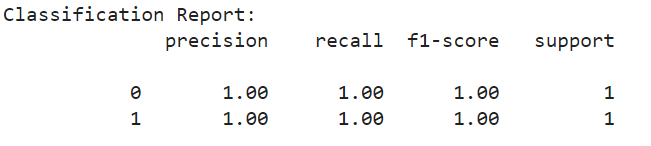


#  Understanding the Labels
*  Label 0: This typically represents negative sentiment in sentiment analysis.
*  Label 1: This usually represents positive sentiment in sentiment analysis.

However, these labels are just conventions, and their meanings depend on how they were set up in your code. You need to confirm which label corresponds to which sentiment (positive or negative).

In This Case the output represnts :

**Detailed Interpretation:**

**1. Label 0 (Negative Sentiment):**

*  **Precision: 1.00**
     *     This means that all the content that was classified as negative by the model was indeed negative.
*  **Recall: 1.00**

      * This indicates that the model correctly identified all negative content in the dataset.
*  **F1-Score: 1.00**
      *   The model was perfect in identifying and classifying negative content.
*  **Support: 1**
     *   There was only 1 instance of negative content in your test dataset.

**2. Label 1 (Positive Sentiment):**

*  **Precision: 1.00**
     *  This means that all the content classified as positive by the model was indeed positive.
*  **Recall: 1.00**
    *  The model correctly identified all positive content in the dataset.
*  **F1-Score: 1.00**
      *  The model was perfect in identifying and classifying positive content.
*  **Support: 1**
     *  There was only 1 instance of positive content in your test dataset.

#  What This Means for Your Client:
*  **Perfect Scores:** The model achieved perfect scores in this small dataset, meaning it perfectly identified and classified both negative and positive sentiments.



# Next Steps for the Client:

**1. Larger Dataset:** To get more reliable results, the client should provide more content (a larger dataset) for analysis. This will help the model better generalize and provide more accurate sentiment analysis across the entire website.

**2. Content Review:**

*  **Positive Content:** If the majority of the content analyzed shows Label 1 with high scores, it indicates that the website’s content is generally perceived positively. The client can focus on maintaining this tone.

*  **Negative Content:** If the model identifies more Label 0 content, the client might want to review those pages and consider adjustments to improve the tone or message.

**Example to Help the Client Understand:**


*  **If the report had many documents with Label 1 (positive sentiment) and high scores:** The client could conclude that their content resonates well with their audience, evoking positive feelings.

*  **If the report had many documents with Label 0 (negative sentiment) and high scores:** The client might need to revisit those pages to understand why they might be eliciting negative sentiment.